In [34]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits

# apply not gate to qubit #0 to make its initial value of 0 a 1
# currently 0, 0
circuit.x(0)
# 1, 0

# cnot, controlled not. flips 2nd qubit value iff first qubit is a 1
# cnot can be used to entangle 
circuit.cx(0, 1)
# 1, 1

circuit.measure([0, 1], [0, 1])

circuit.draw()

In [35]:
from qiskit import IBMQ

IBMQ.save_account(open('token.txt', 'r').read(), overwrite=True)

In [36]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [37]:
# retrieves available backends and lists them in a sorted order
provider = IBMQ.get_provider('ibm-q')

print('retrieving backends (simulators and quantum)...')
# sort simulators and quantum computers by shortest queues
quantum_backends = {}
simulators = {}
for backend in provider.backends():
    if(backend.status().operational):
        if('simulat' in backend.name()):
            simulators[backend.name()] = backend.status().pending_jobs
        else:
            try:
                quantum_backends[backend.name()] = (len(backend.properties().qubits), backend.status().pending_jobs)
            except:
                print('unexpected error in searching for available quantum backends')
# sort simulators by shortest queues
sorted_simulators = sorted(simulators, key=simulators.get)
# sort quantum backends by greatest qubits, then shortest queues
sorted_quantum_backends = sorted(quantum_backends.items(), key=lambda element: (-element[1][0], element[1][1]))

# output
print()
print('available simulator backends:')
for sim in sorted_simulators:
    print(f'{sim} | queue:{simulators[sim]}')
print()
print('available quantum backends:')
for qb in sorted_quantum_backends:
    print(f'{qb[0]} | qubits:{qb[1][0]} queue:{qb[1][1]}')

retrieving backends (simulators and quantum)...

available simulator backends:
ibmq_qasm_simulator | queue:0

available quantum backends:
ibmq_16_melbourne | qubits:15 queue:18
ibmq_ourense | qubits:5 queue:0
ibmqx2 | qubits:5 queue:2
ibmq_burlington | qubits:5 queue:3
ibmq_essex | qubits:5 queue:4
ibmq_vigo | qubits:5 queue:22
ibmq_london | qubits:5 queue:1984
ibmq_armonk | qubits:1 queue:0


In [38]:
from qiskit.tools.monitor import job_monitor

# change based on qubits needed and shortest queue
backend = provider.get_backend('ibmq_ourense')
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


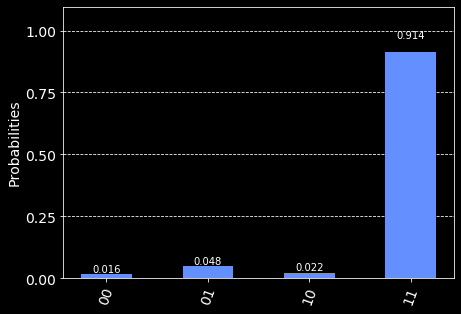

In [39]:
# visualize job
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use('dark_background')

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [40]:
# try different circuit
circuit = q.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits

# apply hadamard gate to qubit #0 to put it in super position
# 
circuit.h(0)
# 1, 0

# cnot, controlled not. flips 2nd qubit value iff first qubit is a 1
# cnot can be used to entangle 
circuit.cx(0, 1)
# 1, 1

circuit.measure([0, 1], [0, 1])

circuit.draw()

Job Status: job has successfully run


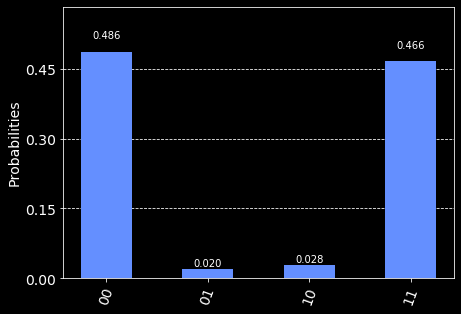

In [41]:
# run job on different circuit
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [43]:
# set up backend for local simulator
from qiskit import Aer # simulator framework for qiskit

for backend in Aer.backends():
    print(backend)

sim_backend = Aer.get_backend('qasm_simulator')


qasm_simulator
statevector_simulator
unitary_simulator


Job Status: job has successfully run


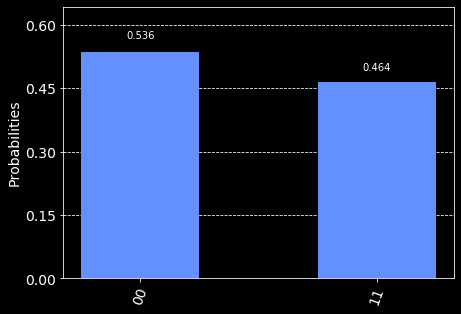

In [44]:
# run circuit on local simulator
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])